# Import Toolkits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use("ggplot")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Download Stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# Read in Data

In [4]:
twitter_df= pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",encoding = "ISO-8859-1")
print(twitter_df.shape)
twitter_df.head()

(1599999, 6)


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


i noticed something here, it`s the column names if you took a look to the dataframe again you gonna find the column names is actually the first data row of the data, so we have to naming the columns and reading the dataframe again!

In [5]:
column_names = ['target' ,'id' , "date" , 'flag','user','text']
twitter_df= pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",names = column_names,encoding = "ISO-8859-1")
print(twitter_df.shape)
twitter_df.head()

(1600000, 6)


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Data Pre-Processing

In [6]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
mask= {
    0: "Negative",
    4: 'Positive'
}

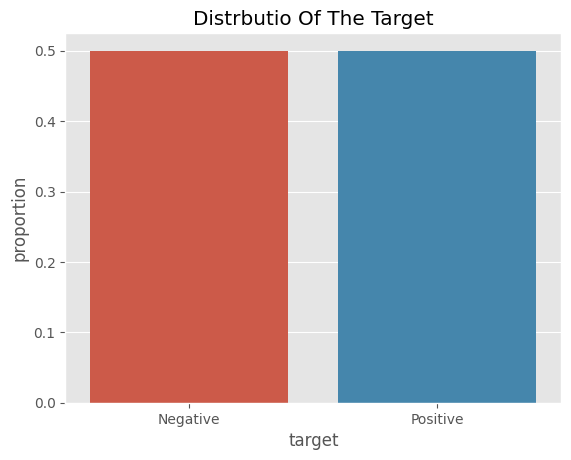

In [8]:
count = twitter_df['target'].value_counts(normalize = True).to_frame().reset_index()
count['target'] =count['target'].replace(mask)
count
sns.barplot(data= count , x = 'target' , y='proportion')
plt.title("Distrbutio Of The Target")
plt.show();

we know that 0 means negative tweet and 1 means positive tweet so we gonna replace "4" to "1"

In [9]:
twitter_df.replace({'target':{4:1}},inplace = True)

In [10]:
twitter_df['target'].unique()

array([0, 1])

# Stemming

In [11]:
port_stem = PorterStemmer()

In [12]:
def stemming(text):

    stemmed_content = re.sub('[^a-zA-Z]' , " ",text)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word)  for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)

    return stemmed_content

In [13]:
twitter_df['stemmed_content'] = twitter_df['text'].apply(stemming)

In [14]:
X = twitter_df['stemmed_content'].values
Y = twitter_df['target'].values

In [16]:
print(X)
print(Y)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']
[0 0 0 ... 1 1 1]


# Spliting The Data into Train & Test

In [17]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.2 , random_state = 42 , stratify = Y)

In [18]:
print("X Train Shape" , X_train.shape)
print("X Test Shape" , X_test.shape)
print("Y Train Shape" , Y_train.shape)
print("Y Test Shape" , Y_test.shape)

X Train Shape (1280000,)
X Test Shape (320000,)
Y Train Shape (1280000,)
Y Test Shape (320000,)


# Converting The Textual Data To Numerical Data

In [19]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test =vectorizer.transform(X_test)

In [20]:
print(X_train)
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9453607 stored elements and shape (1280000, 461280)>
  Coords	Values
  (0, 154767)	0.2697660704325824
  (0, 388138)	0.20555120011808467
  (0, 220296)	0.4301567790762487
  (0, 406297)	0.2978221095272138
  (0, 286478)	0.16123218610004275
  (0, 454381)	0.20169626473577718
  (0, 205794)	0.2414022906380175
  (0, 124524)	0.18318401951949756
  (0, 4832)	0.31707426786115905
  (0, 128605)	0.22108856600702775
  (0, 175252)	0.22407080547034602
  (0, 146067)	0.12929728405657018
  (0, 239679)	0.15130037108228483
  (0, 307108)	0.4620604881532448
  (1, 124611)	0.5113765148324884
  (1, 161801)	0.5778049407933611
  (1, 445870)	0.6361096685891185
  (2, 400192)	0.2722541116865256
  (2, 31063)	0.1936303169258752
  (2, 78861)	0.21039643874061958
  (2, 312657)	0.3154702974657607
  (2, 453420)	0.2347069337186747
  (2, 12436)	0.2529872032123258
  (2, 267649)	0.19309660201644555
  (2, 358186)	0.19837942712286838
  :	:
  (1279997, 120136)	0.518386428

# Training

In [21]:
model = LogisticRegression(max_iter= 1000)

In [22]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

# Prediction

In [23]:
y_pred = model.predict(X_train)
training_acc = accuracy_score(Y_train , y_pred)

In [24]:
print("Accuracy Score Of The Training Data is",training_acc )

Accuracy Score Of The Training Data is 0.8102140625


In [25]:
y_pred_test = model.predict(X_test)
test_acc = accuracy_score(Y_test , y_pred_test)

In [26]:
print("Accuracy Score Of The Training Data is",test_acc )

Accuracy Score Of The Training Data is 0.77869375
